In [1]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
csv = pd.read_csv('NewListAll2014-UPDATE01.csv')

df = pd.DataFrame(csv)
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'State_y'])
df = df.set_index('FIPS')
df.head()

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,HPSA Score,HPSA Shortage,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876","54,366",5.8,1.45,0.90,2.11,7.32,5.17,...,16,6.96,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1
1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,13.30,11.24,...,15,1.03,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11
1005,AL,Barbour County,"26,758","34,971",10.5,2.72,1.89,3.57,5.40,3.35,...,12,0.93,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1
1007,AL,Bibb County,"22,541","39,546",7.2,1.22,0.70,1.92,13.03,9.76,...,19,0.00,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1
1009,AL,Blount County,"57,521","45,567",6.1,1.31,0.77,2.03,14.38,11.55,...,18,16.66,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2


In [3]:
bins = [0, 15, 50, 400]

group = ['Low McDonalds', 'Middle McDonalds', 'High McDonalds']

In [4]:
df['HH_income_2014'] = (df['HH_income_2014'].replace(',', '', regex=True).astype(float))

df.head()

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,HPSA Score,HPSA Shortage,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876",54366.0,5.8,1.45,0.90,2.11,7.32,5.17,...,16,6.96,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1
1003,AL,Baldwin County,"199,189",49626.0,6.1,2.53,1.88,3.36,13.30,11.24,...,15,1.03,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11
1005,AL,Barbour County,"26,758",34971.0,10.5,2.72,1.89,3.57,5.40,3.35,...,12,0.93,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1
1007,AL,Bibb County,"22,541",39546.0,7.2,1.22,0.70,1.92,13.03,9.76,...,19,0.00,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1
1009,AL,Blount County,"57,521",45567.0,6.1,1.31,0.77,2.03,14.38,11.55,...,18,16.66,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2


In [5]:
df["McDonalds Grouping"] = pd.cut(df["McDonalds Count"], bins, labels=group)

df.head()

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,HPSA Shortage,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count,McDonalds Grouping
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876",54366.0,5.8,1.45,0.90,2.11,7.32,5.17,...,6.96,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1,Low McDonalds
1003,AL,Baldwin County,"199,189",49626.0,6.1,2.53,1.88,3.36,13.30,11.24,...,1.03,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11,Low McDonalds
1005,AL,Barbour County,"26,758",34971.0,10.5,2.72,1.89,3.57,5.40,3.35,...,0.93,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1,Low McDonalds
1007,AL,Bibb County,"22,541",39546.0,7.2,1.22,0.70,1.92,13.03,9.76,...,0.00,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1,Low McDonalds
1009,AL,Blount County,"57,521",45567.0,6.1,1.31,0.77,2.03,14.38,11.55,...,16.66,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2,Low McDonalds


In [6]:
df_low = (df['McDonalds Grouping'] == 'Low McDonalds')
df_mid = df['McDonalds Grouping'] == 'Middle McDonalds'
df_Up = df['McDonalds Grouping'] == 'High McDonalds'

In [7]:
df_lowIncome = df[df_low]
df_midIncome = df[df_mid]
df_UpIncome = df[df_Up]

In [8]:
# dfM = df['Mental Deaths'] > 0
# df_Master = df[dfM]

dfM1 = df_lowIncome['Drug Deaths'] > 0
df_Master1 = df_lowIncome[dfM1]

dfM2 = df_midIncome['Drug Deaths'] > 0
df_Master2 = df_midIncome[dfM2]

dfM3 = df_UpIncome['Drug Deaths'] > 0
df_Master3 = df_UpIncome[dfM3]

In [9]:
# X = df_Master['Mental Deaths']
# Y = df_Master['McDonalds Count']

X1 = df_Master1['McDonalds Count']
Y1 = df_Master1['Drug Deaths']

X2 = df_Master2['McDonalds Count']
Y2 = df_Master2['Drug Deaths']

X3 = df_Master3['McDonalds Count']
Y3 = df_Master3['Drug Deaths']


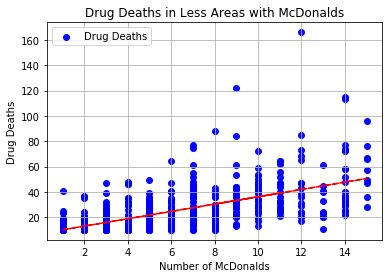

R-sqaured: 0.37807792948614877


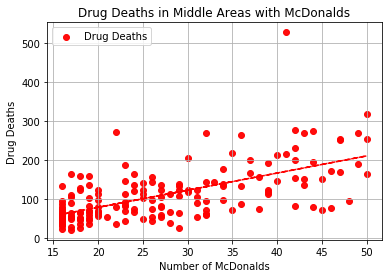

R-sqaured: 0.3891775671604362


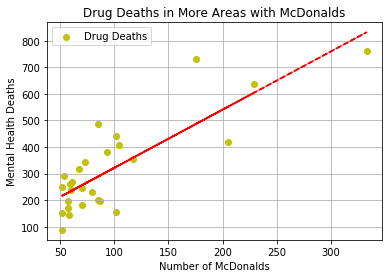

R-sqaured: 0.6790209987798409


In [12]:
# plt.scatter(X, Y, alpha=0.95, c='g')
# z = np.polyfit(X, Y, 1)
# p = np.poly1d(z)
# plt.plot(X, p(X), "r--")
# plt.xlabel('Mental Health Deaths')
# plt.ylabel('Number of McDonalds')
# plt.legend()
# plt.grid()
# plt.title('Mental Health Deaths and McDonalds')
# plt.show()

plt.scatter(X1, Y1, alpha=0.95, c='b')
z = np.polyfit(X1, Y1, 1)
p = np.poly1d(z)
plt.plot(X1, p(X1), "r--")
plt.xlabel('Number of McDonalds')
plt.ylabel('Drug Deaths')
plt.legend()
plt.grid()
plt.title('Drug Deaths in Less Areas with McDonalds')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X1, Y1)

print(f'R-sqaured: {r_value**2}')


plt.scatter(X2, Y2, alpha=0.95, c='r')
z = np.polyfit(X2, Y2, 1)
p = np.poly1d(z)
plt.plot(X2, p(X2), "r--")
plt.xlabel('Number of McDonalds')
plt.ylabel('Drug Deaths')
plt.legend()
plt.grid()
plt.title('Drug Deaths in Middle Areas with McDonalds')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X2, Y2)

print(f'R-sqaured: {r_value**2}')

plt.scatter(X3, Y3, alpha=0.95, c='y')
z = np.polyfit(X3, Y3, 1)
p = np.poly1d(z)
plt.plot(X3, p(X3), "r--")
plt.xlabel('Number of McDonalds')
plt.ylabel('Mental Health Deaths')
plt.legend()
plt.grid()
plt.title('Drug Deaths in More Areas with McDonalds')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X3, Y3)

print(f'R-sqaured: {r_value**2}')



In [11]:
Xa = df_Master3[['McDonalds Count', 'HH_income_2014', 'Unemployment_rate_2014']]
Ya = df_Master3['Drug Deaths']
Ra = sm.add_constant(Xa)
rega = sm.OLS(Ya.astype(float), Xa.astype(float)).fit()

Xb = df_Master3[['McDonalds Count', 'HH_income_2014']] 
Yb = df_Master3['Drug Deaths']
Rb = sm.add_constant(Xb)
regb = sm.OLS(Yb.astype(float), Xb.astype(float)).fit()

Xc = df_Master3[['McDonalds Count', 'Unemployment_rate_2014']]
Yc = df_Master3['Drug Deaths']
Rc = sm.add_constant(Xc)
regc = sm.OLS(Yc.astype(float), Xc.astype(float)).fit()

rega.summary(), regb.summary(), regc.summary()

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:            Drug Deaths   R-squared (uncentered):                   0.937
 Model:                            OLS   Adj. R-squared (uncentered):              0.930
 Method:                 Least Squares   F-statistic:                              119.8
 Date:                Tue, 30 Jul 2019   Prob (F-statistic):                    1.42e-14
 Time:                        00:36:27   Log-Likelihood:                         -159.82
 No. Observations:                  27   AIC:                                      325.6
 Df Residuals:                      24   BIC:                                      329.5
 Df Model:                           3                                                  
 Covariance Type:            nonrobust                                                  
                              coef    std err          t    